# Combining and analyzing Halifax NHS and Census profiles from 2006-2016

This notebook analyzes data collected from the 2006-2016 National Household Survey profiles by census tract number.

In [18]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pathlib
import matplotlib.pyplot as plt
import descartes
from shapely import wkt
import contextily as ctx
import operator

**Read Canadian census tract shapefile data**
- Read data obtained from the [Statistics Canada 2016 Boundary files](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm).
- Reduce dataset to selected tract ID (TID)s for the Halifax area, along with their geometry data.
- Read filtered data obtained from the 2006-2016 NHS profiles and combine it with the Halifax geometry data.

In [2]:
tracts = gpd.read_file('lct_000a16a_e.shp')
tracts = tracts.to_crs(epsg=3857)
tracts.head()

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
0,0010002.00,0002.00,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,001,10001,St. John's,B,"POLYGON ((-5868818.937 6032568.660, -5868626.4..."
1,5370001.09,0001.09,35,Ontario,537,35537,Hamilton,B,"POLYGON ((-8889513.236 5340616.750, -8889520.1..."
2,5370120.02,0120.02,35,Ontario,537,35537,Hamilton,B,"POLYGON ((-8899505.233 5337760.930, -8899589.5..."
3,0010006.00,0006.00,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,001,10001,St. John's,B,"POLYGON ((-5867749.009 6034404.476, -5867795.0..."
4,0010007.00,0007.00,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,001,10001,St. John's,B,"POLYGON ((-5866656.511 6035785.686, -5866595.6..."


In [10]:
halifax = { 'tids': [], 'geometry': [] }
for index, row in tracts.iterrows():
  tid = float(row.CTUID)
  if (tid > 2050000.00 and tid < 2050025.03) or (tid > 2050099.00 and tid < 2050105.00) or (tid > 2050107.00 and tid < 2050113.00):
    halifax['tids'].append(row.CTUID)
    halifax['geometry'].append(row.geometry)

In [34]:
data2006 = pd.read_csv('2006-census-data.csv')
data2011 = pd.read_csv('2011-census-data.csv')
data2016 = pd.read_csv('2006-census-data.csv')

data2006['geometry'] = halifax['geometry']
data2011['geometry'] = halifax['geometry']
data2016['geometry'] = halifax['geometry']

halifax2006 = gpd.GeoDataFrame(data2006, geometry='geometry')
halifax2011 = gpd.GeoDataFrame(data2011, geometry='geometry')
halifax2016 = gpd.GeoDataFrame(data2016, geometry='geometry')
halifax2016.head()

,tid,population,white,indigenous,black,asian,minority,adult,income,home,rent,geometry
0,2050001.00,3650.0,3215.0,55.0,330.0,20.0,30.0,1915.0,19592.0,148100.0,475.0,"POLYGON ((-7081505.483 5559791.027, -7081480.6..."
1,2050002.00,5200.0,4635.0,120.0,245.0,145.0,55.0,2805.0,24012.0,226552.0,534.0,"POLYGON ((-7080065.205 5563897.150, -7080020.1..."
2,2050003.00,2700.0,2240.0,10.0,90.0,290.0,70.0,1740.0,26366.0,479064.0,907.0,"POLYGON ((-7075139.274 5560833.900, -7075774.0..."
3,2050004.01,3205.0,2650.0,40.0,70.0,340.0,105.0,2425.0,17524.0,235254.0,780.0,"POLYGON ((-7077844.279 5562882.253, -7077779.2..."
4,2050004.02,4175.0,3415.0,50.0,115.0,510.0,85.0,2885.0,14430.0,378830.0,761.0,"POLYGON ((-7080821.792 5567602.914, -7080891.4..."


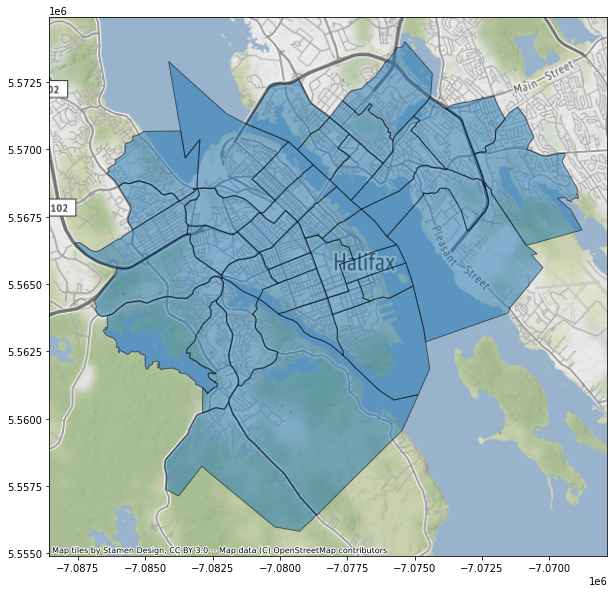

In [35]:
ax = halifax2006.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)